# Python Blinders Notebook
----
## Data Mining Project with Starcraft II Data
----
### Data Visualization
Afin de pouvoir extraire différentes features des données founies, commençons par une étape de visualisation de données afin de se rendre compte des éventuelles disparitées de ces dernières.

Commençons par observer le nombre de parties dont nous disposons pour chaque joueur. 

Number of players : 200
Max: 58 ;  Min: 4
Average: 15.26


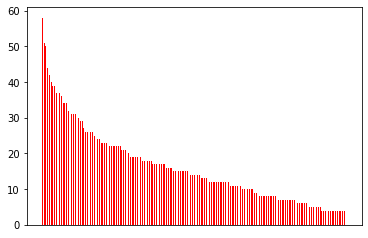

In [3]:
# coding: utf-8
import matplotlib.pyplot as plt

path_to_csv = "starcraft-2-player-prediction-challenge-2020/TRAIN.CSV"


def read_csv(path_to_file: str):
    content = []
    with open(path_to_file, 'r') as csv_file:
        for line in csv_file.read().splitlines():
            content.append(line.split(','))

    return content


data = read_csv(path_to_csv) 

## Number of games per player
count_plays_per_player = {}

for play in data:
    if play[0] in count_plays_per_player:
        count_plays_per_player[play[0]] += 1
    else:
        count_plays_per_player[play[0]] = 1

print(f"Number of players : {len(count_plays_per_player.keys())}")

sorted_list = sorted(
    count_plays_per_player.items(),
    key=lambda item: item[1],
    reverse=True
)
sorted_x = []
sorted_y = []
for elem in sorted_list:
    sorted_x.append(elem[0].split('/')[-2])
    sorted_y.append(elem[1])
print(f"Max: {sorted_y[0]} ;  Min: {sorted_y[-1]}")
print(f"Average: {sum(sorted_y)/len(sorted_y)}")
plt.bar(sorted_x, sorted_y, width=0.5, color='r', align='edge')
# Hide the x labels because unreadable
plt.xticks([])
plt.show()

Nous pouvons ainsi remarquer que, dans les données qui nous sont fournies, tous les joueurs n'ont pas le même nombre de parties jouées: cela varie entre **4** et **58** parties, avec une moyenne de **15** parties.

Maintenant, nous allons observer la moyenne du nombre d'actions sur toutes les parties de chaque joueurs.

Max: 5228.0 ;  Min: 825.2
Average: 2689.4308139525424


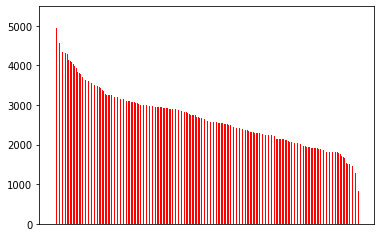

In [10]:
count_actions_per_player = {}
count_games_per_player = {}
for index_play, play in enumerate(data):
    id_player = play[0]
    if id_player not in count_games_per_player:
        count_games_per_player[id_player] = 0
        count_actions_per_player[id_player] = 0
    else:
        count_games_per_player[id_player] += 1

    for index, elem in enumerate(play):
        if index < 2:
            continue

        if 't' in elem and "hotkey" not in elem:
            continue

        count_actions_per_player[id_player] += 1

for player in count_games_per_player:
    count_actions_per_player[player] = count_actions_per_player[player] / count_games_per_player[player] 

sorted_list = sorted(
    count_actions_per_player.items(),
    key=lambda item: item[1],
    reverse=True
)
sorted_x = []
sorted_y = []
for elem in sorted_list:
    sorted_x.append(elem[0])
    sorted_y.append(elem[1])

print(f"Max: {sorted_y[0]} ;  Min: {sorted_y[-1]}")
print(f"Average: {sum(sorted_y)/len(sorted_y)}")

plt.bar(sorted_x, sorted_y, width=0.5, color='r', align='edge')
plt.xticks([])
plt.show()

Ici aussi nous pouvons observer une certaines disparité: certains joueurs, au cours de leurs parties, réalisent beacoup plus d'actions en moyenne que d'autres.

Nous pouvons allons maintenant mesuré le temps moyen des parties d'un joueurs. Au vu des données, nous pouvons savoir la durée d'une partie, plus ou moins 5 secondes. 

Max: 1742.6666666666667 ;  Min: 31.75931055709449
Average: 346.66259545953295


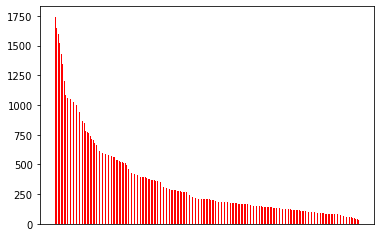

In [11]:
time_game_per_player = {}
count_games_per_player = {}
for index_play, play in enumerate(data):
    id_player = play[0]
    duration = 0
    if id_player not in count_games_per_player:
        count_games_per_player[id_player] = 0
        time_game_per_player[id_player] = 0
    else:
        count_games_per_player[id_player] += 1

    for index, elem in enumerate(play):
        if index < 2:
            continue

        if 't' in elem and "hotkey" not in elem:
            duration = int(elem.split('t')[1])

    time_game_per_player[id_player] += duration
    
for player in count_games_per_player:
    count_actions_per_player[player] = count_actions_per_player[player] / count_games_per_player[player] 

sorted_list = sorted(
    count_actions_per_player.items(),
    key=lambda item: item[1],
    reverse=True
)
sorted_x = []
sorted_y = []
for elem in sorted_list:
    sorted_x.append(elem[0])
    sorted_y.append(elem[1])

print(f"Max: {sorted_y[0]} ;  Min: {sorted_y[-1]}")
print(f"Average: {sum(sorted_y)/len(sorted_y)}")

plt.bar(sorted_x, sorted_y, width=0.5, color='r', align='edge')
plt.xticks([])
plt.show()

Ici aussi nous pouvons observer une forte disparité en fonction des joueurs, la moyenne de la durée d'une partie variant de **31** à **1742** secondes. Il convient de noter que certaines parties sont vides de toutes actions, et s'arrête donc à t0 (8 au total). Cela peut baisser la moyenne de certains joueurs.

Nous allons maintenant nous interressé à l'APM des joueurs, qui correspond aux Actions Per Minutes. Voyons si cette features permet de discriminer les joueurs entre eux. 

Max: 365.7349694831449 ;  Min: 47.45387892180733
Average: 153.47881504223722


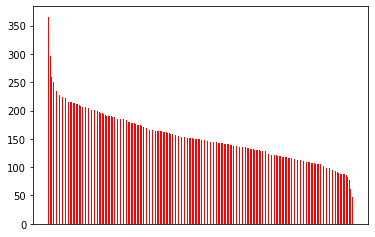

In [12]:
apm_per_player_per_game = {}
count_games_per_player = {}
for index_play, play in enumerate(data):
    id_player = play[0]
    duration = 0
    nb_actions = 0
    if len(play) < 3:
        continue
    
    if id_player not in count_games_per_player:
        count_games_per_player[id_player] = 0
        apm_per_player_per_game[id_player] = 0
    else:
        count_games_per_player[id_player] += 1

    for index, elem in enumerate(play):
        if index < 2:
            continue

        if 't' in elem and "hotkey" not in elem:
            duration = int(elem.split('t')[1])
            continue

        nb_actions += 1

    apm_per_player_per_game[id_player] += nb_actions / (duration/60) if duration != 0 else 0

for player in count_games_per_player:
    apm_per_player_per_game[player] = apm_per_player_per_game[player] / count_games_per_player[player] 

sorted_list = sorted(
    apm_per_player_per_game.items(),
    key=lambda item: item[1],
    reverse=True
)
sorted_x = []
sorted_y = []
for elem in sorted_list:
    sorted_x.append(elem[0])
    sorted_y.append(elem[1])

print(f"Max: {sorted_y[0]} ;  Min: {sorted_y[-1]}")
print(f"Average: {sum(sorted_y)/len(sorted_y)}")

plt.bar(sorted_x, sorted_y, width=0.5, color='r', align='edge')
plt.xticks([])
plt.show()

Ici, nous constatons également un certaines différences entre les joueurs.

Le début d'une partie est en général très carré, les joueurs de haut niveau ont en tête les actions qu'ils devront effectuer. Nous allons donc essayer de voir si nous avons un résultat plus précis si nous limitons l'obesrvation des apm aux deux premières minutes de jeu.

Max: 0.0 ;  Min: 0.0
Average: 0.0


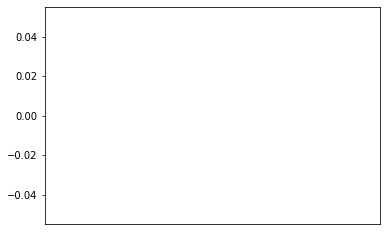

In [13]:
apm_per_player_per_game = {}
count_games_per_player = {}
for index_play, play in enumerate(data):
    id_player = play[0]
    duration = 0
    nb_actions = 0
    if len(play) < 3:
        continue

    if id_player not in count_games_per_player:
        count_games_per_player[id_player] = 0
        apm_per_player_per_game[id_player] = 0
    else:
        count_games_per_player[id_player] += 1

    for index, elem in enumerate(play):
        if index < 2:
            continue

        if 't' in elem and "hotkey" not in elem:
            duration = int(elem.split('t')[1])
        
        if duration < 120:
            nb_actions += 1
            continue
        else:
            break

    apm_per_player_per_game[id_player] += nb_actions / 2 if duration > 120 else 0

for player in count_games_per_player:
    apm_per_player_per_game[player] = apm_per_player_per_game[player] / count_games_per_player[player] 

sorted_list = sorted(
    apm_per_player_per_game.items(),
    key=lambda item: item[1],
    reverse=True
)
sorted_x = []
sorted_y = []
for elem in sorted_list:
    sorted_x.append(elem[0])
    sorted_y.append(elem[1])

print(f"Max: {sorted_y[0]} ;  Min: {sorted_y[-1]}")
print(f"Average: {sum(sorted_y)/len(sorted_y)}")

plt.bar(sorted_x, sorted_y, width=0.5, color='r', align='edge')
plt.xticks([])
plt.show()

On peut voir que l'écart entre les joueurs est encore plus significatif sur les deux premières minutes de jeu, ce qui nous permettra peut-être par la suite de tester uniquement sur 

Nous allons tenter de voir quel est le pourcentage de joueurs qui ne joue qu'une seule race ou plusieurs afin de donner un poid plus important à ce paramètre lors de la création de notre arbre de décisions.

Number of players: 200 


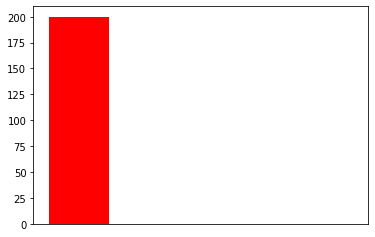

In [14]:
count_races_per_player = {}
for index_play, play in enumerate(data):
    id_player = play[0]
    played_race = play[1]

    if len(play) < 3:
        continue
    
    if id_player not in count_races_per_player:
        count_races_per_player[id_player] = {}
        count_races_per_player[id_player]['Zerg'] = False
        count_races_per_player[id_player]['Protoss'] = False
        count_races_per_player[id_player]['Terran'] = False
        count_races_per_player[id_player][played_race] = True
    else :
        count_races_per_player[id_player][played_race] = True

number_of_multiraces_players = {}
number_of_multiraces_players['players_with_one_race'] = 0
number_of_multiraces_players['players_with_two_races'] = 0
number_of_multiraces_players['players_with_three_races'] = 0
for player in count_races_per_player:

    true_count =  0
    if count_races_per_player[player]['Zerg']:
        true_count += 1
    if count_races_per_player[player]['Protoss']:
        true_count += 1
    if count_races_per_player[player]['Terran']:
        true_count += 1

    if true_count == 1:
        number_of_multiraces_players['players_with_one_race']  += 1
    elif true_count == 2:
        number_of_multiraces_players['players_with_two_races'] += 1
    elif true_count == 3:
        number_of_multiraces_players['players_with_three_races'] += 1

sorted_list = sorted(
    number_of_multiraces_players.items(),
    key=lambda item: item[1],
    reverse=True
)
sorted_x = []
sorted_y = []
for elem in sorted_list:
    sorted_x.append(elem[0])
    sorted_y.append(elem[1])

print(f"Number of players: {sorted_y[0]} ")

plt.bar(sorted_x, sorted_y, width=0.5, color='r', align='edge')
plt.xticks([])
plt.show()

Nous pouvons constater ici que, dans les données fournies, chaque joueur a joué toutes ces parties avec la même race.
Cette feature semble donc assez discriminante et pourrait avoir un poids important. Néanmoins, nous devons également observer le nombre de parties jouées et le nombre de joueur par race.

In [16]:
count_games_per_races = {
    'Zerg': 0,
    'Protoss': 0,
    'Terran': 0
}
count_players_per_races = {}
for index_play, play in enumerate(data):
    id_player = play[0]
    played_race = play[1]

    if len(play) < 3:
        continue
    
    
    count_players_per_player[id_player] = {}
    count_players_per_player[id_player]['Zerg'] = 0
    count_players_per_player[id_player]['Protoss'] = 0
    count_players_per_player[id_player]['Terran'] = 0
    count_players_per_player[id_player][played_race] = True

        count_races_per_player[id_player][played_race] = True

number_of_multiraces_players = {}
number_of_multiraces_players['players_with_one_race'] = 0
number_of_multiraces_players['players_with_two_races'] = 0
number_of_multiraces_players['players_with_three_races'] = 0
for player in count_races_per_player:

    true_count =  0
    if count_races_per_player[player]['Zerg']:
        true_count += 1
    if count_races_per_player[player]['Protoss']:
        true_count += 1
    if count_races_per_player[player]['Terran']:
        true_count += 1

    if true_count == 1:
        number_of_multiraces_players['players_with_one_race']  += 1
    elif true_count == 2:
        number_of_multiraces_players['players_with_two_races'] += 1
    elif true_count == 3:
        number_of_multiraces_players['players_with_three_races'] += 1

sorted_list = sorted(
    number_of_multiraces_players.items(),
    key=lambda item: item[1],
    reverse=True
)
sorted_x = []
sorted_y = []
for elem in sorted_list:
    sorted_x.append(elem[0])
    sorted_y.append(elem[1])

print(f"Number of players: {sorted_y[0]} ")

plt.bar(sorted_x, sorted_y, width=0.5, color='r', align='edge')
plt.xticks([])
plt.show()

NameError: name 'count_players_per_player' is not defined

----
## Extraction des features

Nous avons pensé aux features suivantes:

* La **race** joué : Teran, Zerg ou Protoss 

* La **fréquence d'utilisation des actions** : Base, Hotkeys, Mineral ... Le fait d'utilisé la fréquence permet de pallier au différences de durées des parties.

* Le **nombre de chaque type d'actions** sur les 20 premières secondes : les actions en début de partie sont primordiales dans le jeu et chaque joueur peut avoir des hotkeys favorites (car personnalisable) pour effectuer les premières actions essentielles.

* La fréquence des **création**, des **modification** et d'**utilisation** des Hotkeys

* La **durée** de la partie

* L'**APM** du joueur sur toute la partie 


Nous avons donc extrait ces features des données qui nous sont fournies et nous en sommes servies pour alimenter un **Random Forrest Classifier** puisque nous devons utiliser, comme indiqué dans le sujet, des **Decision Trees**. Pour cela,
nous avons utilisé la bibliothèque python Scikit Learn. Nous avons décidé d'exclure les parties vides de toute action.


In [23]:
from enum import Enum
from sklearn.ensemble import RandomForestClassifier


path_file_train = "starcraft-2-player-prediction-challenge-2020/TRAIN.CSV"
path_file_test = "starcraft-2-player-prediction-challenge-2020/TEST.CSV"

class PlayedRace(Enum):
    Protoss = 0
    Zerg = 1
    Terran = 2


def get_features(data, train: bool):
    if train:
        labels = ['id', 'PlayedRace', 'apm', 'duration', 'created', 'updated', 'used', 'Base', 's', 'SingleMineral']
    else:
        labels = ['PlayedRace', 'apm', 'duration', 'created', 'updated', 'used', 'Base', 's', 'SingleMineral']
    for i in range(0, 10):
        for j in range(0, 3):
            key = f"hotkey{i}{j}"
            labels.append(key)

    # Actions under 20sec
    to_add = []
    for i, elem in enumerate(labels):
        if train and i < 4:
            continue
        elif not train and i < 3:
            continue
        to_add.append(f"{elem}:T20")
    labels.extend(to_add)
    
    # Actions under 40sec
    to_add = []
    for i, elem in enumerate(labels):
        if train and i < 4:
            continue
        elif not train and i < 3:
            continue
        to_add.append(f"{elem}:T40")
    labels.extend(to_add)

    # Actions under 60sec
    to_add = []
    for i, elem in enumerate(labels):
        if train and i < 4:
            continue
        elif not train and i < 3:
            continue
        to_add.append(f"{elem}:T60")
    labels.extend(to_add)

    # Action per minute and duration
    # labels.append('apm')
    # labels.append('duration')

    featured_data = []

    for play in data:
        t_party = 0
        count_hotkey = 0
        if len(play) < 3:
            continue
        new_line = [0]*len(labels)
        if train:
            number_of_actions = len(play) - 2
        else:
            number_of_actions = len(play) - 1

        for index, elem in enumerate(play):
            if index == 0:
                if train:
                    new_line[0] = elem
                else:
                    new_line[0] = PlayedRace[elem].value
                continue

            if index == 1 and train:
                new_line[labels.index("PlayedRace")] = PlayedRace[elem].value
                continue

            if 't' != elem[0]:
                new_line[labels.index(elem)] += 1

                if t_party < 20:
                    new_line[labels.index(f"{elem}:T20")] += 1
                if t_party < 40:
                    new_line[labels.index(f"{elem}:T40")] += 1
                if t_party < 60:
                    new_line[labels.index(f"{elem}:T60")] += 1

                if "hotkey" in elem:
                    count_hotkey += 1
                    status = int(elem[-1])
                    if status == 0:
                        new_line[labels.index("created")] += 1
                    elif status == 1:
                        new_line[labels.index("updated")] += 1
                    elif status == 2:
                        new_line[labels.index("used")] += 1

            else:
                t_party = int(elem.split('t')[1])
                number_of_actions -= 1

        for i in range(0, len(new_line)):
            if ":T20" not in labels[i] and ":T40" not in labels[i] and ":T60" not in labels[i] :
                if train and i > 6:
                    new_line[i] = new_line[i]/number_of_actions
                elif not train and i > 5:
                    new_line[i] = new_line[i]/number_of_actions

        # Freq Hotkeys
        new_line[labels.index("created")] = new_line[labels.index("created")]/count_hotkey
        new_line[labels.index("updated")] = new_line[labels.index("updated")]/count_hotkey
        new_line[labels.index("used")] = new_line[labels.index("used")]/count_hotkey
        # APM
        new_line[labels.index("apm")] = (number_of_actions/((t_party+5)/60))
        # Duration
        new_line[labels.index("duration")] = t_party+5

        featured_data.append(new_line)


    return featured_data


# Read CSV Train data
data = read_csv(path_file_train)
# Extract Features
X = get_features(data, train=True)
y = []

for elem in X:
    y.append(elem.pop(0))

# Train Model
classifier = RandomForestClassifier()
classifier.fit(X, y)

# Read CSV Test data
data = read_csv(path_file_test)
# Extract Features
features = get_features(data, train=False)

# Make predictions and write result
namefile = 'Results/test.csv'
with open(namefile, 'w') as sub_file:
    sub_file.write("RowId,prediction\n")
    y_pred = classifier.predict(features)
    print("Store results...")
    for i, res in enumerate(y_pred):
        sub_file.write(f"{i+1},{res}\n")


Store results...


----
## Evaluation d'un algorithme : Ramdom Forest Classifier

### Description
 EXPLICITER LE RANDOM dans le titre  /  dire que cette méthode permet de limiter l'overfitting (justifier)

 Le terme Random vient du fait que les features des sous-échatillons sont choisis aléatoirement.
 
Le nom "forêt" de ce classifier vient du fait qu'il utilise de nombreux arbres de décision différents. Les arbres de décision sont en général assez bons sur leurs données d'entrainement, 
mais lorsqu'il s'agit de classifier des nouvelles données, ils peuvent se révéler incorrects. Le fait d'utiliser un grand nombre d'arbre et ensuite de faire une moyenne va permettre d'améliorer 
la fiabilité générale du classifier en limitant l'importance donnée aux mauvais arbres décisionnels et en ajoutant de l'importance au fait que les arbres décisionnels sont globalement bons. 
Ce classifier applique les actions suivantes : 
  * Séparer les données en plusieurs échantillons
  * Choisir un certains nombre de features grâce à une fonction de critères (expliciter ici) pour chacun des échantillons
  * Créer un arbre de décision à partir de chacun des échantillons => X échantillons donnera X arbres, d'où l'apellation de "forêt"
  * Lors des prédictions, chaque entrée sera évaluée sur l'ensemble des arbres de décision. La prédiction finale est déterminée par la moyenne de chacune des prédictions.

### Les Paramètres

Le Random Forrest Classifier est implémenté nativement dans scikit-learn. 
Cet objet possède 19 paramètres en tout. Nous allons vous en présenter quelques-uns que nous avons décidé de tester, ainsi que les résultats que nous arrivons à obtenir:
  * **_n_estimators_**: Permet de spécifier le nombre d'estimateurs, c'est à dire le nombre d'arbres décisionnel composant la forêt
  * **_max_samples_**: Permet de limiter la taille des échantillons par une valeur maximale, si _bootstrap_=True. Sinon, tout le dataset est utilisé pour construire chaque arbre. 
  * **_max_features_**: Permet de spécifiier le nombre de features sélectionnées lors de la création des meilleurs échantillons possibles. (DEVELOPPER LES DIFFERENTES METHODES)
  * **_criterion_**: Permet de spécifier la fonction à utiliser pour mesurer la qualité des échantillons. Deux choix sont possibles : 
    * _Gini_ (pour Indice ou Coefficient de Gini): Mesure statistique permettant de rendre compte de la répartition d'une variable au sein d'une population.
    * _Entropy_: Pour mesurer la quantité d'information d'une feature à propos d'un ensemble
  * **_class_weight_**: Permet de spécifier des poids pour chacune des features. Si non spécifier, toutes les features sont supposé avoir un poids de 1.

Afin de mesurer la qualité de notre modèle, nous allons utiliser la fonction **_cross_val_score_** avec _cv_=5 afin d'entrainer cinq fois le model avec différents splits de données à chaque fois,
puis d'obtenir la moyenne du score sur ces entrainement et prédictions.

Nous allons commencer par laisser les valeurs de défaut de ces paramètres, c'est à dire:
  * **_n_estimators_** = 100
  * **_max_samples_** = None, donc avec _bootstrap_=True, _max_samples_ est égal au nombre de dimension de *X*.
  * **_max_features_** = auto. Correspond donc à $\sqrt{n\_features}$
  * **_criterion_** = Gini
  * **_class_weight_**: None. Donc toutes les features ont un poids de 1.

Avec ses paramètres ainsi que nos features explicitées précedemment, nous obtenons une précision de *0,911*.


### Expérimentations

Nous avons tenté de trouver les paramètres optimaux pour notre jeu de données. Nous avons donc réalisé certains tests afin d'observer les différences des prédictions. Nous avons également utilisé les fonctionnalité random search cv et gridsearch cv afin de trouver les valeurs optimales des hyper paramètres. Nous avons constaté des résultats assez différents à chaque éxecution, qui semble démontrer le côté aléatoire du Random Forest, même si les résultats ne fluctuent pas énormément et restent globalement bons.

D'ailleurs, en cherchant les meilleurs hyperparamètres avec GridSearchCV sur les paramètres \[max_depth, max_features, max_samples_leaf, min_samples_split, n_estimators\], nous arrivons au final avec de moins bons résultats en utilisant les paramètres 'optimaux' que les paramètres de bases...
 



In [25]:
from sklearn.model_selection import cross_val_score
# Influence du nombre d'arbres dans la random forest
data = read_csv(path_to_csv)

X = get_features(data, train=True)

y = []
for elem in X:
    y.append(elem.pop(0))

for i in [0, 1, 2]:
    results_n_estimators_x = []
    results_n_estimators_y = []
    # 20 by 20 from 10 to 100 
    for i in range(10, 110, 10):
        classifier = RandomForestClassifier(n_estimators=i)
        score = cross_val_score(classifier, X, y, cv=5)
        results_n_estimators_x.append(i)
        results_n_estimators_y.append(score.mean())
    
    # 100 by 100 from 200 to 1000
    for i in range(200, 1100, 100):
        classifier = RandomForestClassifier(n_estimators=i)
        score = cross_val_score(classifier, X, y, cv=5)
        results_n_estimators_x.append(i)
        results_n_estimators_y.append(score.mean())

    # TODO Faire une fonction linéaire, pas un bar plot
    plt.plot(results_n_estimators_x, results_n_estimators_y)

plt.show()

ImportError: cannot import name 'cross_val_score' from 'sklearn.metrics' (/home/dante/INSA/ML_OT2/Starcraft_Python_Blinders/.venv/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

### Comparaison avec un arbre décisionel 

Nous avons une fonction qui nous permet de regarder la qualité d'un algorithme par rapport à un autre. Cette fonction garde 20% des données d'entraînement de côté et va les utiliser pour tester ensuite le réseau de neurones entrainé. Voici ce que l'on obtient avec un arbre décisionel: 


Voici ce que l'on obtient avec une random forest avec les paramètres par défaut :

### Avantages

### Inconvénients